In [1]:
import glob
import matplotlib.pylab as plt
import seaborn as sns
import os.path as op
import pandas as pd
import numpy as np
from itertools import compress

%matplotlib inline
%config InlineBackend.figure_format = 'png'

pd.set_option("mode.chained_assignment", None)

In [2]:
def items_cont_str(input_list, string, sort=False):
    """
    returns a list of items which contain a given string
    optionally sorted
    """
    output_list = [string in i for i in input_list]
    output_list = list(compress(input_list, output_list))
    if sort:
        output_list.sort()
    return output_list

def dir_change_chk(bin_cond):
    if (bin_cond == 0) or (bin_cond == 2):
        return 0
    if (bin_cond == 1) or (bin_cond == 3):
        return 1

In [114]:
path_data = "/home/maciek/git/stirring_beh_analysis/data/"
path_figs = "/home/maciek/Dropbox/stirring_figures/"

bin_cond = {0: ((0, 5), 'no change of coherence and direction'),
            1: ((1, 4), 'change of direction only'),
            2: ((2, 7), 'change of coherence but no direction'),
            3: ((3, 6), 'change of both coherence and direction')
            }

labels = [
    "no change of coherence \nand direction", 
    "change of \ndirection only", 
    "change of coherence \nbut no direction", 
    "change of both \ncoherence and direction"

]
f_types = [
    "arrow_training",
    "stir_training_50",
    "stir_training_main",
    "stir_main_LAB",
    "stir_main_MEG"
]

time = np.linspace(0.0, 4.0, num=1000)

blink_ix = (487, 512)

In [4]:
csv_path = op.join(path_data, "**", "*.csv")
pickle_path = op.join(path_data, "**", "*.pkl")
all_csvs = [i for i in glob.iglob(csv_path, recursive=True)]
all_pickles = [i for i in glob.iglob(pickle_path, recursive=True)]
all_csvs = items_cont_str(all_csvs, "_results_data.csv", sort=True)

In [5]:
results = [pd.read_csv(i) for i in all_csvs]
results = pd.concat(results)

In [6]:
results["RT_engage"] = None
results.RT_engage = results.engage_ix.apply(lambda x: time[x] * 1000)

In [7]:
results["RT_change"] = None
results.RT_change = results.change_ix.apply(lambda x: time[x])
results.RT_change = (results.RT_change - time[blink_ix[1]]) * 1000

In [8]:
results.time_phase1 = results.time_phase1.apply(lambda x: x * 100)
results.time_phase2 = results.time_phase2.apply(lambda x: x * 100)

In [9]:
print(list(results))

['clockwise', 'conditions', 'run', 'session', 'subject', 'trial', 'engage_ix', 'change_ix', 'time_phase1', 'time_phase2', 'filename', 'exp_type', 'binned_cond', 'RT_engage', 'RT_change']


### EXPERIMENT 1 ARROW

In [20]:
data_arrow = results.loc[(results.exp_type == f_types[0])]
data_arrow["change_dir"] = None
data_arrow.change_dir = data_arrow.binned_cond.apply(dir_change_chk)
data_arrow.to_csv(op.join(path_data, "arrow_data.csv"), index_label=False, index=False)

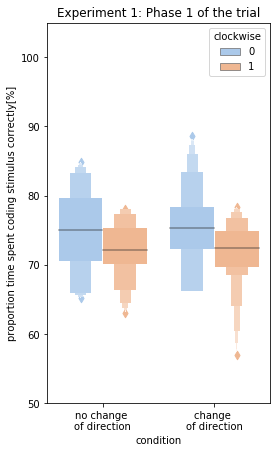

In [106]:
data_gb = data_arrow.groupby(["subject", "change_dir", "clockwise"])["time_phase1"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="time_phase1", x="change_dir", hue="clockwise", palette="pastel")
plt.ylim((50,105))
plt.title("Experiment 1: Phase 1 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly[%]")
plt.xlabel("condition")
# plt.xticks([0,1], ["dots: right \nmovement: clockwise", "dots: right \nmovement: anti-\nclockwise"])
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.savefig(op.join(path_figs, "exp1_ph1.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp1_ph1.svg"), bbox_inches="tight")

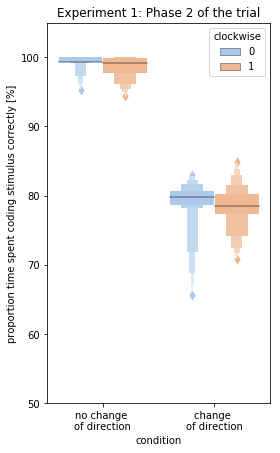

In [107]:
data_gb = data_arrow.groupby(["subject", "change_dir", "clockwise"])["time_phase2"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="time_phase2", x="change_dir", hue="clockwise", palette="pastel")
plt.title("Experiment 1: Phase 2 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly [%]")
plt.xlabel("condition")
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.ylim((50,105))
plt.savefig(op.join(path_figs, "exp1_ph2.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp1_ph2.svg"), bbox_inches="tight")

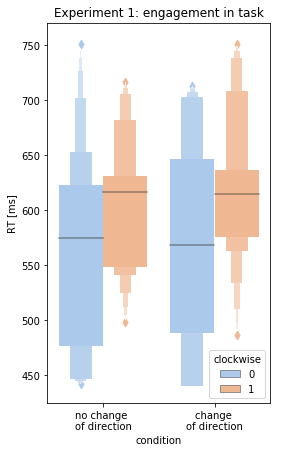

In [108]:
data_gb = data_arrow.groupby(["subject", "change_dir", "clockwise"])["RT_engage"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="RT_engage", x="change_dir", hue="clockwise", palette="pastel")
# plt.ylim((0.5,1.1))
plt.title("Experiment 1: engagement in task")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.savefig(op.join(path_figs, "exp1_en_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp1_en_RT.svg"), bbox_inches="tight")

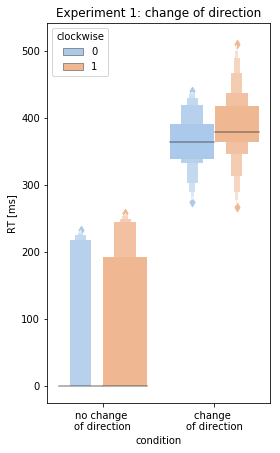

In [109]:
data_gb = data_arrow.groupby(["subject", "change_dir", "clockwise"])["RT_change"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="RT_change", x="change_dir", hue="clockwise", palette="pastel")
plt.title("Experiment 1: change of direction")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.savefig(op.join(path_figs, "exp1_ch_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp1_ch_RT.svg"), bbox_inches="tight")

### EXPERIMENT 2 DOTS 50

In [29]:
data_dots_50 = results.loc[(results.exp_type == f_types[1])]
data_dots_50["change_dir"] = None
data_dots_50.change_dir = data_dots_50.binned_cond.apply(dir_change_chk)
data_dots_50.to_csv(op.join(path_data, "dots_50_data.csv"), index_label=False, index=False)

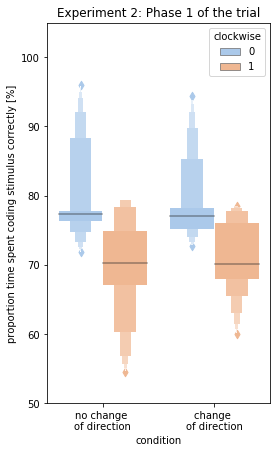

In [110]:
data_gb = data_dots_50.groupby(["subject", "change_dir", "clockwise"])["time_phase1"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="time_phase1", x="change_dir", hue="clockwise", palette="pastel")
plt.ylim((50,105))
plt.title("Experiment 2: Phase 1 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly [%]")
plt.xlabel("condition")
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.savefig(op.join(path_figs, "exp2_ph1.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp2_ph1.svg"), bbox_inches="tight")

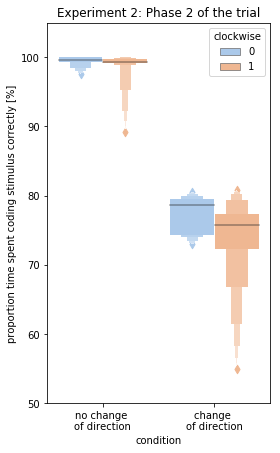

In [111]:
data_gb = data_dots_50.groupby(["subject", "change_dir", "clockwise"])["time_phase2"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="time_phase2", x="change_dir", hue="clockwise", palette="pastel")
plt.ylim((50,105))
plt.title("Experiment 2: Phase 2 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly [%]")
plt.xlabel("condition")
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.savefig(op.join(path_figs, "exp2_ph2.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp2_ph2.svg"), bbox_inches="tight")

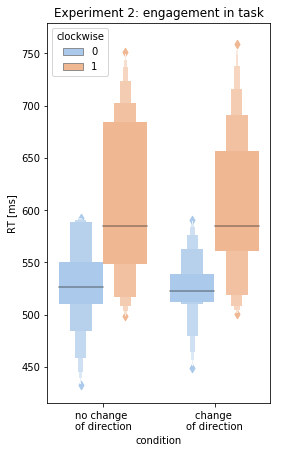

In [112]:
data_gb = data_dots_50.groupby(["subject", "change_dir", "clockwise"])["RT_engage"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="RT_engage", x="change_dir", hue="clockwise", palette="pastel")
# plt.ylim((0.5,1.1))
plt.title("Experiment 2: engagement in task")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.savefig(op.join(path_figs, "exp2_en_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp2_en_RT.svg"), bbox_inches="tight")

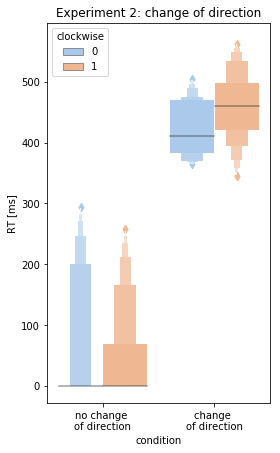

In [113]:
data_gb = data_dots_50.groupby(["subject", "change_dir", "clockwise"])["RT_change"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(4,7))
sns.boxenplot(data=data_gb, y="RT_change", x="change_dir", hue="clockwise", palette="pastel")
plt.title("Experiment 2: change of direction")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1], ["no change \nof direction", "change \nof direction"])
plt.savefig(op.join(path_figs, "exp2_ch_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp2_ch_RT.svg"), bbox_inches="tight")

### EXPERIMENT 3 MAIN w/ FEEDBACK 

In [11]:
data_main_feedback = results.loc[(results.exp_type == f_types[2])]
data_main_feedback.to_csv(op.join(path_data, "data_main_feedback.csv"), index_label=False, index=False)

data_change = data_main_feedback.loc[(data_main_feedback.binned_cond == 1) | (data_main_feedback.binned_cond == 3)]
data_change.to_csv(op.join(path_data, "data_change_main_feedback.csv"), index_label=False, index=False)
data_no_change = data_main_feedback.loc[(data_main_feedback.binned_cond == 0) | (data_main_feedback.binned_cond == 2)]
data_no_change.to_csv(op.join(path_data, "data_no_change_main_feedback.csv"), index_label=False, index=False)
del data_change, data_no_change

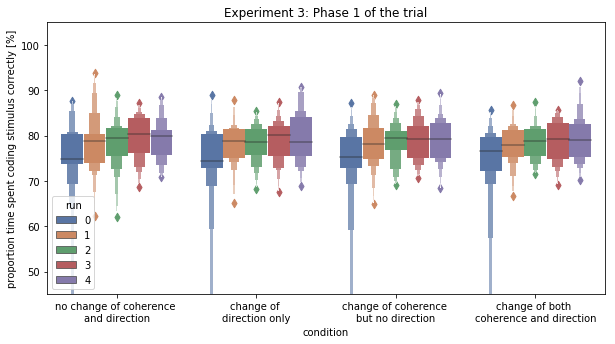

In [132]:
data_gb = data_main_feedback.groupby(["subject", "binned_cond", "clockwise", "run"])["time_phase1"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="time_phase1", hue="run", x="binned_cond", palette="deep")
# sns.pointplot(data=data_gb, y="time_phase1", x="run", hue="binned_cond", palette="pastel", ci=None, dodge=True)
plt.ylim((45,105))
plt.title("Experiment 3: Phase 1 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly [%]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp3_ph1.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp3_ph1.svg"), bbox_inches="tight")

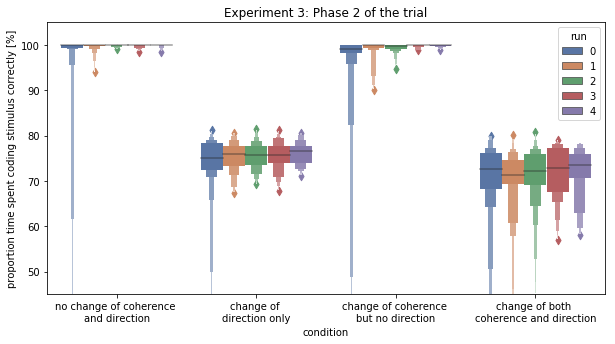

In [131]:
data_gb = data_main_feedback.groupby(["subject", "binned_cond", "clockwise", "run"])["time_phase2"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="time_phase2", hue="run", x="binned_cond",  palette="deep")
# sns.pointplot(data=data_gb, y="time_phase2", x="run", hue="binned_cond", ci=None, palette="pastel")
plt.ylim((45,105))

plt.title("Experiment 3: Phase 2 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly [%]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp3_ph2.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp3_ph2.svg"), bbox_inches="tight")

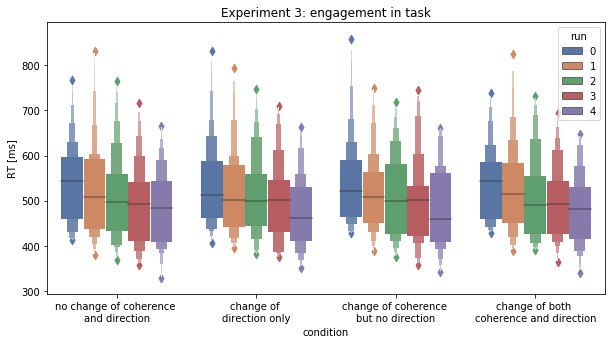

In [130]:
data_gb = data_main_feedback.groupby(["subject", "binned_cond", "clockwise", "run"])["RT_engage"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="RT_engage", hue="run", x="binned_cond",  palette="deep")
plt.title("Experiment 3: engagement in task")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp3_en_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp3_en_RT.svg"), bbox_inches="tight")

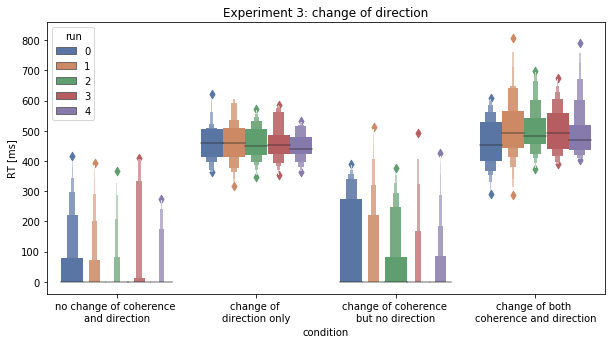

In [133]:
data_gb = data_main_feedback.groupby(["subject", "binned_cond", "clockwise", "run"])["RT_change"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="RT_change", hue="run", x="binned_cond",  palette="deep")
plt.title("Experiment 3: change of direction")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp3_ch_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp3_ch_RT.svg"), bbox_inches="tight")

### EXPERIMENT 4 NO FEEDBACK

In [95]:
data_main = results.loc[(results.exp_type == f_types[3])]
data_main.to_csv(op.join(path_data, "data_main.csv"), index_label=False, index=False)

data_change = data_main_feedback.loc[(data_main_feedback.binned_cond == 1) | (data_main_feedback.binned_cond == 3)]
data_change.to_csv(op.join(path_data, "data_change_main.csv"), index_label=False, index=False)
data_no_change = data_main_feedback.loc[(data_main_feedback.binned_cond == 0) | (data_main_feedback.binned_cond == 2)]
data_no_change.to_csv(op.join(path_data, "data_no_change_main.csv"), index_label=False, index=False)
del data_change, data_no_change

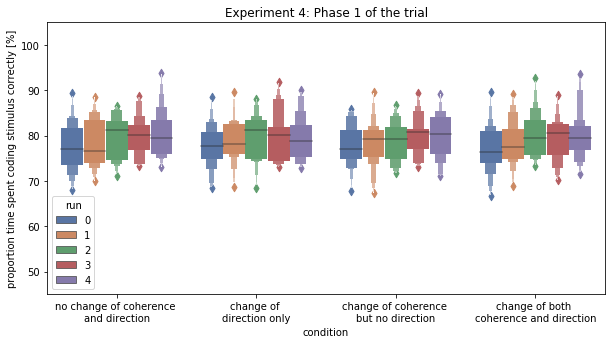

In [134]:
data_gb = data_main.groupby(["subject", "binned_cond", "clockwise", "run"])["time_phase1"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="time_phase1", hue="run", x="binned_cond", palette="deep")
plt.ylim((45,105))
plt.title("Experiment 4: Phase 1 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly [%]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp4_ph1.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp4_ph1.svg"), bbox_inches="tight")

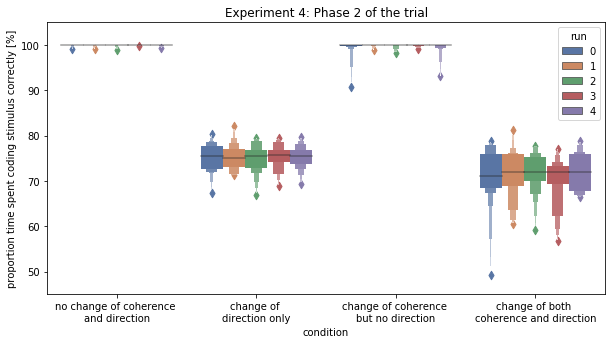

In [135]:
data_gb = data_main.groupby(["subject", "binned_cond", "clockwise", "run"])["time_phase2"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="time_phase2", hue="run", x="binned_cond", palette="deep")
plt.ylim((45,105))
plt.title("Experiment 4: Phase 2 of the trial")
plt.ylabel("proportion time spent coding stimulus correctly [%]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp4_ph2.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp4_ph2.svg"), bbox_inches="tight")

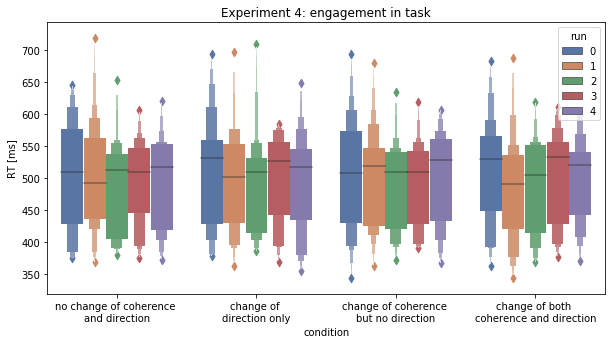

In [136]:
data_gb = data_main.groupby(["subject", "binned_cond", "clockwise", "run"])["RT_engage"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="RT_engage", hue="run", x="binned_cond",  palette="deep")
plt.title("Experiment 4: engagement in task")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp4_en_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp4_en_RT.svg"), bbox_inches="tight")

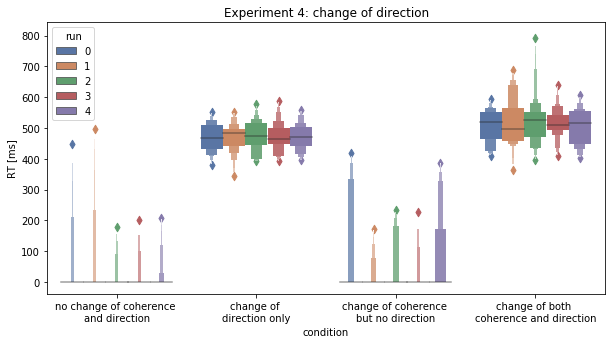

In [137]:
data_gb = data_main.groupby(["subject", "binned_cond", "clockwise", "run"])["RT_change"].median()
data_gb = data_gb.reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(data=data_gb, y="RT_change", hue="run", x="binned_cond",  palette="deep")
plt.title("Experiment 4: change of direction")
plt.ylabel("RT [ms]")
plt.xlabel("condition")
plt.xticks([0,1,2,3], labels)
plt.savefig(op.join(path_figs, "exp4_ch_RT.png"), bbox_inches="tight")
plt.savefig(op.join(path_figs, "exp4_ch_RT.svg"), bbox_inches="tight")